In [1]:
# Import all required packages
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
# Reading original dataset
bank_train = pd.read_csv(r"C:\Users\Bader Ale\Documents\WGU MSDA\Data Cleaning - D206\D206 textbook data files\bank_marketing_training.csv")

In [3]:
# Using shape to see (rows, columns)
bank_train.shape

(26874, 21)

In [4]:
# Viewing first 5 records
bank_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,days_since_previous,previous,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [5]:
# Creating a new column called index
bank_train['index'] = pd.Series(range(0,26874))

In [6]:
# Replacing '999' values in the 'days_since_previous' with NaN from the numpy package
bank_train['days_since_previous'] = bank_train['days_since_previous'].replace({999:np.NAN})

In [7]:
# Checking to see the changes in the 'days_since_previous' column
bank_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,days_since_previous,previous,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,index
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,1
2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,2
3,25,services,single,high.school,no,yes,no,telephone,may,mon,...,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,3
4,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,...,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,4


<AxesSubplot: title={'center': 'Histogram of Days Since Previous'}, ylabel='Frequency'>

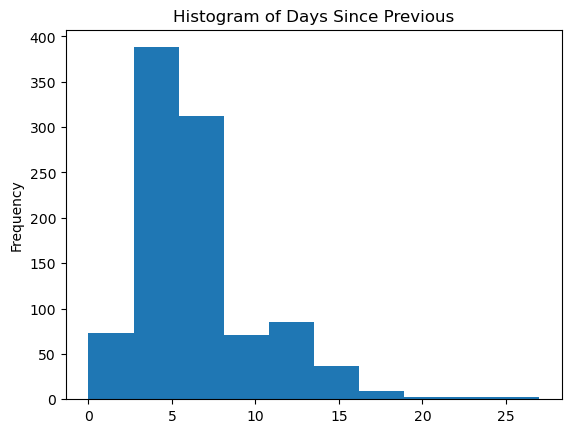

In [8]:
bank_train['days_since_previous'].plot(kind = 'hist', title='Histogram of Days Since Previous')

In [9]:
# Column 'education' is categorical - we will replace the name 'education' to 'education_numeric'
bank_train['education_numeric'] = bank_train['education']

In [10]:
# Checking genral info on dataset columns
bank_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26874 entries, 0 to 26873
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  26874 non-null  int64  
 1   job                  26874 non-null  object 
 2   marital              26874 non-null  object 
 3   education            26874 non-null  object 
 4   default              26874 non-null  object 
 5   housing              26874 non-null  object 
 6   loan                 26874 non-null  object 
 7   contact              26874 non-null  object 
 8   month                26874 non-null  object 
 9   day_of_week          26874 non-null  object 
 10  duration             26874 non-null  int64  
 11  campaign             26874 non-null  int64  
 12  days_since_previous  982 non-null    float64
 13  previous             26874 non-null  int64  
 14  previous_outcome     26874 non-null  object 
 15  emp.var.rate         26874 non-null 

In [11]:
# Creating a dictionary list to convert the categorical to numerical for the 'education' column
dict_edu = {"education_numeric": 
    {"illiterate": 0,
    "basic.4y": 4, 
    "basic.6y": 6,
    "basic.9y": 9, 
    "high.school":12, 
    "professional.course": 12,
    "university.degree":16,
    "unknown": np.NaN}}

In [12]:
# Replacing the 'education' column with the dictionary list created above
bank_train.replace(dict_edu, inplace=True)

In [24]:
# Checking the 'education_numeric' column
bank_train['education_numeric']

0         4.0
1        12.0
2         NaN
3        12.0
4        12.0
         ... 
26869    16.0
26870    16.0
26871     4.0
26872    12.0
26873    12.0
Name: education_numeric, Length: 26874, dtype: float64

In [15]:
# Creating 'age_z' column to standardize 'age' column using z-scores
# from numpy package
bank_train['age_z'] = stats.zscore(bank_train['age'])

In [22]:
# Checking for the new 'age_z' column - last column
bank_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26874 entries, 0 to 26873
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  26874 non-null  int64  
 1   job                  26874 non-null  object 
 2   marital              26874 non-null  object 
 3   education            26874 non-null  object 
 4   default              26874 non-null  object 
 5   housing              26874 non-null  object 
 6   loan                 26874 non-null  object 
 7   contact              26874 non-null  object 
 8   month                26874 non-null  object 
 9   day_of_week          26874 non-null  object 
 10  duration             26874 non-null  int64  
 11  campaign             26874 non-null  int64  
 12  days_since_previous  982 non-null    float64
 13  previous             26874 non-null  int64  
 14  previous_outcome     26874 non-null  object 
 15  emp.var.rate         26874 non-null 

In [25]:
# Viewing both 'age' and 'age_z' columns
bank_train[['age','age_z']]

,age,age_z
0,56,1.539625
1,57,1.635778
2,41,0.097330
3,25,-1.441118
4,29,-1.056506
...,...,...
26869,36,-0.383435
26870,37,-0.287282
26871,29,-1.056506
26872,73,3.174226


# Finding outliers in the data

In [27]:
# Finding outliers in the 'age' columns where z-score is greater or less than 3
# and save the records in a new dataset called bank_train_outliers
bank_train_outliers = bank_train.query('age_z > 3 | age_z < -3')

In [28]:
# Let's see the output of the bank_train_outlier dataframe
bank_train_outliers

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,index,education_numeric,age_z
18166,73,retired,married,university.degree,no,yes,no,cellular,mar,tue,...,failure,-1.8,92.843,-50.0,1.687,5099,no,18166,16.0,3.174226
18179,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,...,nonexistent,-1.8,92.843,-50.0,1.663,5099,no,18179,4.0,4.616521
18181,88,retired,divorced,basic.4y,no,no,no,cellular,mar,wed,...,nonexistent,-1.8,92.843,-50.0,1.663,5099,yes,18181,4.0,4.616521
18183,88,retired,divorced,basic.4y,no,yes,yes,cellular,mar,wed,...,nonexistent,-1.8,92.843,-50.0,1.663,5099,yes,18183,4.0,4.616521
18186,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,...,nonexistent,-1.8,92.843,-50.0,1.663,5099,yes,18186,4.0,4.616521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26735,84,retired,divorced,basic.4y,unknown,yes,no,cellular,oct,fri,...,nonexistent,-1.1,94.601,-49.5,0.993,4963,no,26735,4.0,4.231909
26739,74,retired,divorced,basic.4y,no,yes,no,cellular,oct,mon,...,nonexistent,-1.1,94.601,-49.5,1.000,4963,no,26739,4.0,3.270379
26740,74,retired,divorced,basic.4y,no,yes,no,cellular,oct,mon,...,success,-1.1,94.601,-49.5,1.000,4963,no,26740,4.0,3.270379
26750,81,retired,married,basic.4y,no,yes,no,cellular,oct,wed,...,failure,-1.1,94.601,-49.5,1.016,4963,yes,26750,4.0,3.943450


In [29]:
# Creating a new dataset from the original that sorts it by 'age_z' ascending
bank_train_sort = bank_train.sort_values(['age_z'], ascending = False)

In [30]:
# Viewing output of bank_train_sort
bank_train_sort

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,index,education_numeric,age_z
24840,91,retired,married,university.degree,no,no,yes,cellular,sep,wed,...,nonexistent,-3.4,92.379,-29.8,0.781,5017,no,24840,16.0,4.904980
24833,91,retired,married,university.degree,no,yes,yes,cellular,sep,wed,...,failure,-3.4,92.379,-29.8,0.781,5017,no,24833,16.0,4.904980
26520,89,retired,divorced,basic.4y,no,yes,no,cellular,sep,tue,...,nonexistent,-1.1,94.199,-37.5,0.881,4963,yes,26520,4.0,4.712674
26015,89,retired,divorced,basic.4y,no,no,no,cellular,jun,mon,...,nonexistent,-1.7,94.055,-39.8,0.720,4991,yes,26015,4.0,4.712674
18179,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,...,nonexistent,-1.8,92.843,-50.0,1.663,5099,no,18179,4.0,4.616521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24777,18,student,single,unknown,no,unknown,unknown,cellular,sep,thu,...,nonexistent,-3.4,92.379,-29.8,0.809,5017,no,24777,NaN,-2.114189
24553,17,student,single,basic.9y,no,unknown,unknown,cellular,aug,fri,...,failure,-2.9,92.201,-31.4,0.869,5076,yes,24553,9.0,-2.210342
24527,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,...,failure,-2.9,92.201,-31.4,0.869,5076,no,24527,9.0,-2.210342
24255,17,student,single,unknown,no,yes,no,cellular,aug,wed,...,success,-2.9,92.201,-31.4,0.884,5076,no,24255,NaN,-2.210342


In [31]:
# Output the age and marital status of the 15 highest records with the largest z-scores
bank_train_sort[['age', 'marital', 'age_z']].head(n=15)

,age,marital,age_z
24840,91,married,4.904980
24833,91,married,4.904980
26520,89,divorced,4.712674
26015,89,divorced,4.712674
18179,88,divorced,4.616521
18181,88,divorced,4.616521
18183,88,divorced,4.616521
18186,88,divorced,4.616521
18187,88,divorced,4.616521
18188,88,divorced,4.616521
